# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


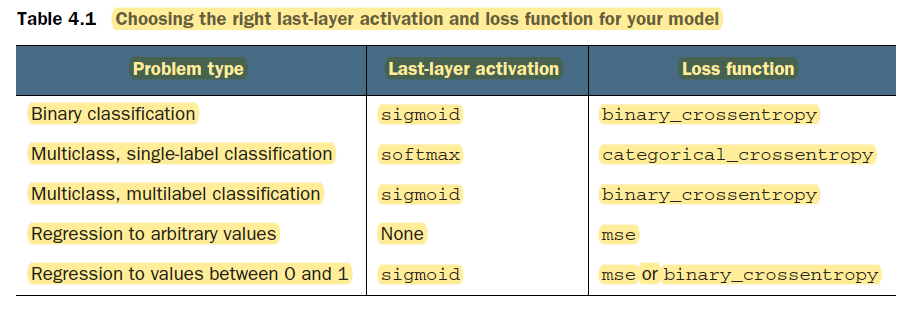

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,  Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras import optimizers

# Load Data

In [2]:
con_df = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
con_df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
con_df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
con_df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'flyash',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine', 'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'},inplace=True)

In [7]:
con_df.head()

,cement,slag,flyash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
# check how many categories present in each Column
cat_list = []
count = 0
for col in con_df.columns:
    if con_df[col].dtype == 'O' and col != 'strength':
        print(len(con_df[col].unique())," lablels in ",col)
        cat_list.append(col)
        count += len(con_df[col].unique())

In [9]:
count

0

<AxesSubplot:>

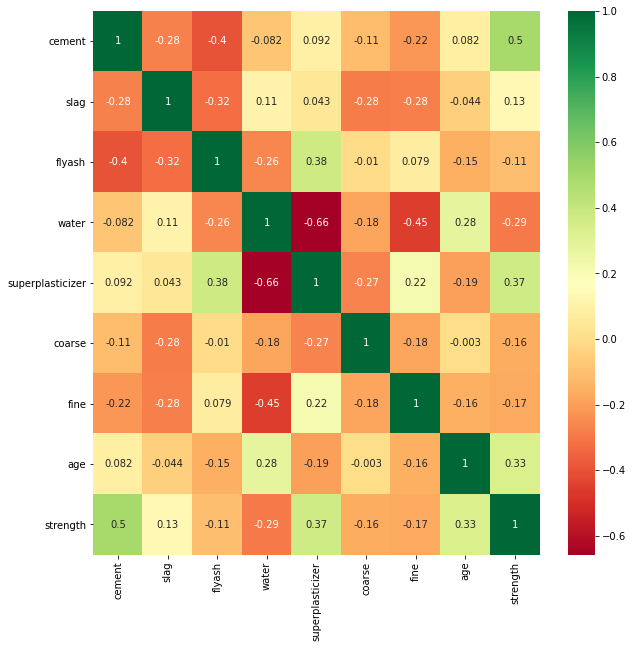

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(con_df.corr(),annot=True,cmap="RdYlGn")

In [11]:
con_df.corr()["strength"].sort_values(ascending=False)

strength            1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarse             -0.164935
fine               -0.167241
water              -0.289633
Name: strength, dtype: float64

# Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = (con_df.loc[:, con_df.columns != 'strength'])
y = (con_df.loc[:, con_df.columns == 'strength'])

In [14]:
print(x.shape)
print(y.shape)

(1030, 8)
(1030, 1)


In [15]:
# Split to 70% Train and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Split 50% Test into further 15% Test and 15% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(721, 8)
(154, 8)
(155, 8)


In [17]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(721, 1)
(154, 1)
(155, 1)


# Scale Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [20]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.transform(x_test)
x_val_s = min_max_scaler.transform(x_val)

In [21]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

(721, 8)
(154, 8)
(155, 8)


# Build Model

In [22]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [23]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [24]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
23/23 [==============================] - 2s 29ms/step - loss: 1598.9622 - mae: 36.3492 - val_loss: 1539.4341 - val_mae: 35.9198
Epoch 2/500
23/23 [==============================] - 0s 8ms/step - loss: 1598.8531 - mae: 36.3233 - val_loss: 1519.5831 - val_mae: 35.6512
Epoch 3/500
23/23 [==============================] - 0s 8ms/step - loss: 1551.5681 - mae: 35.7278 - val_loss: 1488.4062 - val_mae: 35.2271
Epoch 4/500
23/23 [==============================] - 0s 8ms/step - loss: 1445.8138 - mae: 34.3714 - val_loss: 1439.0049 - val_mae: 34.5458
Epoch 5/500
23/23 [==============================] - 0s 13ms/step - loss: 1412.6320 - mae: 33.6279 - val_loss: 1359.9233 - val_mae: 33.4255
Epoch 6/500
23/23 [==============================] - 0s 9ms/step - loss: 1381.3810 - mae: 33.2267 - val_loss: 1238.3899 - val_mae: 31.6185
Epoch 7/500
23/23 [==============================] - 0s 8ms/step - loss: 1246.2715 - mae: 31.4261 - val_loss: 1069.5084 - val_mae: 28.9240
Epoch 8/500
23/23 [======

Epoch 61/500
23/23 [==============================] - 0s 9ms/step - loss: 109.3294 - mae: 8.1851 - val_loss: 102.3924 - val_mae: 8.1057
Epoch 62/500
23/23 [==============================] - 0s 6ms/step - loss: 104.8763 - mae: 8.1371 - val_loss: 102.1873 - val_mae: 8.0910
Epoch 63/500
23/23 [==============================] - 0s 6ms/step - loss: 109.4577 - mae: 8.3284 - val_loss: 101.6803 - val_mae: 8.0766
Epoch 64/500
23/23 [==============================] - 0s 5ms/step - loss: 106.0797 - mae: 8.2528 - val_loss: 101.6028 - val_mae: 8.0614
Epoch 65/500
23/23 [==============================] - 0s 6ms/step - loss: 111.8166 - mae: 8.4410 - val_loss: 100.7824 - val_mae: 8.0306
Epoch 66/500
23/23 [==============================] - 0s 6ms/step - loss: 94.7973 - mae: 7.8004 - val_loss: 100.4093 - val_mae: 8.0147
Epoch 67/500
23/23 [==============================] - 0s 6ms/step - loss: 106.9895 - mae: 8.1324 - val_loss: 99.8332 - val_mae: 7.9905
Epoch 68/500
23/23 [==============================

23/23 [==============================] - 0s 6ms/step - loss: 92.9961 - mae: 7.6211 - val_loss: 81.0604 - val_mae: 7.1725
Epoch 122/500
23/23 [==============================] - 0s 6ms/step - loss: 93.9374 - mae: 7.3950 - val_loss: 81.1544 - val_mae: 7.1771
Epoch 123/500
23/23 [==============================] - 0s 6ms/step - loss: 95.3599 - mae: 7.6388 - val_loss: 80.5288 - val_mae: 7.1503
Epoch 124/500
23/23 [==============================] - 0s 6ms/step - loss: 86.6502 - mae: 7.1521 - val_loss: 79.9345 - val_mae: 7.1243
Epoch 125/500
23/23 [==============================] - 0s 6ms/step - loss: 91.6353 - mae: 7.3950 - val_loss: 80.2852 - val_mae: 7.1460
Epoch 126/500
23/23 [==============================] - 0s 6ms/step - loss: 85.3137 - mae: 7.0949 - val_loss: 79.5172 - val_mae: 7.1142
Epoch 127/500
23/23 [==============================] - 0s 6ms/step - loss: 80.8957 - mae: 6.9126 - val_loss: 79.2837 - val_mae: 7.1038
Epoch 128/500
23/23 [==============================] - 0s 6ms/step - 

Epoch 182/500
23/23 [==============================] - 0s 6ms/step - loss: 57.2102 - mae: 5.7579 - val_loss: 56.0636 - val_mae: 6.1194
Epoch 183/500
23/23 [==============================] - 0s 6ms/step - loss: 60.0847 - mae: 5.8927 - val_loss: 56.9271 - val_mae: 6.0979
Epoch 184/500
23/23 [==============================] - 0s 5ms/step - loss: 59.9223 - mae: 5.8782 - val_loss: 56.7668 - val_mae: 6.0913
Epoch 185/500
23/23 [==============================] - 0s 5ms/step - loss: 58.2772 - mae: 5.8224 - val_loss: 56.4077 - val_mae: 6.0777
Epoch 186/500
23/23 [==============================] - 0s 5ms/step - loss: 55.0327 - mae: 5.5366 - val_loss: 56.3383 - val_mae: 6.0594
Epoch 187/500
23/23 [==============================] - 0s 5ms/step - loss: 57.8219 - mae: 5.8128 - val_loss: 55.6749 - val_mae: 6.0330
Epoch 188/500
23/23 [==============================] - 0s 5ms/step - loss: 56.8496 - mae: 5.7281 - val_loss: 57.0456 - val_mae: 6.0698
Epoch 189/500
23/23 [==============================] - 

Epoch 243/500
23/23 [==============================] - 0s 5ms/step - loss: 46.2295 - mae: 5.1212 - val_loss: 49.1433 - val_mae: 5.6939
Epoch 244/500
23/23 [==============================] - 0s 5ms/step - loss: 50.0035 - mae: 5.2744 - val_loss: 48.8606 - val_mae: 5.6797
Epoch 245/500
23/23 [==============================] - 0s 5ms/step - loss: 44.6930 - mae: 5.1098 - val_loss: 47.0160 - val_mae: 5.6255
Epoch 246/500
23/23 [==============================] - 0s 5ms/step - loss: 48.2200 - mae: 5.3489 - val_loss: 49.5795 - val_mae: 5.7148
Epoch 247/500
23/23 [==============================] - 0s 5ms/step - loss: 49.6208 - mae: 5.3374 - val_loss: 49.4237 - val_mae: 5.7042
Epoch 248/500
23/23 [==============================] - 0s 5ms/step - loss: 52.7971 - mae: 5.5326 - val_loss: 47.2031 - val_mae: 5.6194
Epoch 249/500
23/23 [==============================] - 0s 5ms/step - loss: 46.2998 - mae: 5.1556 - val_loss: 47.2262 - val_mae: 5.6267
Epoch 250/500
23/23 [==============================] - 

Epoch 304/500
23/23 [==============================] - 0s 5ms/step - loss: 43.6727 - mae: 5.1226 - val_loss: 46.7462 - val_mae: 5.6183
Epoch 305/500
23/23 [==============================] - 0s 5ms/step - loss: 42.6652 - mae: 5.0715 - val_loss: 45.2615 - val_mae: 5.5622
Epoch 306/500
23/23 [==============================] - 0s 5ms/step - loss: 48.1653 - mae: 5.4646 - val_loss: 45.4129 - val_mae: 5.5672
Epoch 307/500
23/23 [==============================] - 0s 5ms/step - loss: 44.9434 - mae: 5.1559 - val_loss: 44.9977 - val_mae: 5.5617
Epoch 308/500
23/23 [==============================] - 0s 5ms/step - loss: 44.1769 - mae: 5.1619 - val_loss: 45.2736 - val_mae: 5.5732
Epoch 309/500
23/23 [==============================] - 0s 6ms/step - loss: 44.3360 - mae: 5.1148 - val_loss: 48.5106 - val_mae: 5.6696
Epoch 310/500
23/23 [==============================] - 0s 5ms/step - loss: 44.1606 - mae: 5.0273 - val_loss: 44.6478 - val_mae: 5.5463
Epoch 311/500
23/23 [==============================] - 

Epoch 365/500
23/23 [==============================] - 0s 5ms/step - loss: 42.0556 - mae: 5.0636 - val_loss: 45.7398 - val_mae: 5.5950
Epoch 366/500
23/23 [==============================] - 0s 5ms/step - loss: 45.9683 - mae: 5.1914 - val_loss: 46.8689 - val_mae: 5.6345
Epoch 367/500
23/23 [==============================] - 0s 5ms/step - loss: 48.6725 - mae: 5.2507 - val_loss: 46.3963 - val_mae: 5.6276
Epoch 368/500
23/23 [==============================] - 0s 5ms/step - loss: 40.1367 - mae: 4.9328 - val_loss: 46.4391 - val_mae: 5.6307
Epoch 369/500
23/23 [==============================] - 0s 5ms/step - loss: 45.5360 - mae: 5.2739 - val_loss: 46.1021 - val_mae: 5.6127
Epoch 370/500
23/23 [==============================] - 0s 5ms/step - loss: 43.4591 - mae: 5.0996 - val_loss: 45.6748 - val_mae: 5.5988
Epoch 371/500
23/23 [==============================] - 0s 5ms/step - loss: 38.1035 - mae: 4.8121 - val_loss: 45.6613 - val_mae: 5.6113
Epoch 372/500
23/23 [==============================] - 

23/23 [==============================] - 0s 5ms/step - loss: 44.2582 - mae: 5.1393 - val_loss: 45.8496 - val_mae: 5.5670
Epoch 426/500
23/23 [==============================] - 0s 5ms/step - loss: 45.8526 - mae: 5.2440 - val_loss: 45.5535 - val_mae: 5.5693
Epoch 427/500
23/23 [==============================] - 0s 5ms/step - loss: 41.0971 - mae: 5.0241 - val_loss: 46.0700 - val_mae: 5.5868
Epoch 428/500
23/23 [==============================] - 0s 5ms/step - loss: 44.0697 - mae: 5.1166 - val_loss: 46.2472 - val_mae: 5.5817
Epoch 429/500
23/23 [==============================] - 0s 5ms/step - loss: 43.1933 - mae: 4.9826 - val_loss: 47.4894 - val_mae: 5.6148
Epoch 430/500
23/23 [==============================] - 0s 5ms/step - loss: 42.0721 - mae: 5.0166 - val_loss: 44.1517 - val_mae: 5.5250
Epoch 431/500
23/23 [==============================] - 0s 6ms/step - loss: 42.7982 - mae: 5.0908 - val_loss: 45.8793 - val_mae: 5.5626
Epoch 432/500
23/23 [==============================] - 0s 5ms/step - 

Epoch 486/500
23/23 [==============================] - 0s 5ms/step - loss: 41.8876 - mae: 5.0257 - val_loss: 44.1694 - val_mae: 5.5321
Epoch 487/500
23/23 [==============================] - 0s 5ms/step - loss: 40.9568 - mae: 5.0501 - val_loss: 46.4872 - val_mae: 5.5916
Epoch 488/500
23/23 [==============================] - 0s 5ms/step - loss: 45.3379 - mae: 5.1233 - val_loss: 44.8539 - val_mae: 5.5394
Epoch 489/500
23/23 [==============================] - 0s 6ms/step - loss: 40.9305 - mae: 5.0328 - val_loss: 46.6902 - val_mae: 5.5825
Epoch 490/500
23/23 [==============================] - 0s 6ms/step - loss: 41.1121 - mae: 4.8974 - val_loss: 44.8315 - val_mae: 5.5356
Epoch 491/500
23/23 [==============================] - 0s 6ms/step - loss: 40.1065 - mae: 4.9069 - val_loss: 46.7919 - val_mae: 5.5906
Epoch 492/500
23/23 [==============================] - 0s 6ms/step - loss: 44.1829 - mae: 5.0249 - val_loss: 46.5477 - val_mae: 5.5854
Epoch 493/500
23/23 [==============================] - 

# Check Model Loss and Error

In [25]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

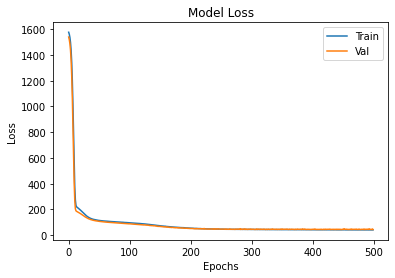

In [26]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

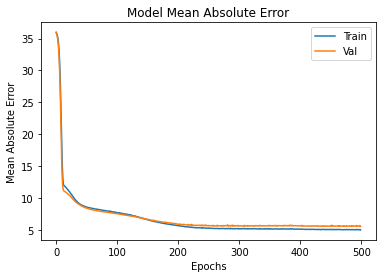

In [27]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (1) Retune Model (increase neurons per layer)

In [28]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(15, activation='relu', input_dim=8))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [29]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [30]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
23/23 [==============================] - 1s 13ms/step - loss: 1558.7034 - mae: 35.7826 - val_loss: 1529.5483 - val_mae: 35.7695
Epoch 2/500
23/23 [==============================] - 0s 5ms/step - loss: 1565.6856 - mae: 35.7487 - val_loss: 1489.9088 - val_mae: 35.2023
Epoch 3/500
23/23 [==============================] - 0s 6ms/step - loss: 1643.6887 - mae: 36.7500 - val_loss: 1424.7577 - val_mae: 34.2617
Epoch 4/500
23/23 [==============================] - 0s 5ms/step - loss: 1408.4894 - mae: 33.7458 - val_loss: 1320.4297 - val_mae: 32.6979
Epoch 5/500
23/23 [==============================] - 0s 6ms/step - loss: 1290.1810 - mae: 31.7477 - val_loss: 1160.1039 - val_mae: 30.1513
Epoch 6/500
23/23 [==============================] - 0s 6ms/step - loss: 1116.8801 - mae: 29.1717 - val_loss: 933.1511 - val_mae: 26.2817
Epoch 7/500
23/23 [==============================] - 0s 5ms/step - loss: 828.7369 - mae: 23.9280 - val_loss: 663.1481 - val_mae: 21.2477
Epoch 8/500
23/23 [==========

23/23 [==============================] - 0s 5ms/step - loss: 109.6119 - mae: 8.2619 - val_loss: 106.7150 - val_mae: 8.3137
Epoch 61/500
23/23 [==============================] - 0s 5ms/step - loss: 113.9638 - mae: 8.5623 - val_loss: 106.5758 - val_mae: 8.3078
Epoch 62/500
23/23 [==============================] - 0s 5ms/step - loss: 114.6629 - mae: 8.6127 - val_loss: 106.2495 - val_mae: 8.2903
Epoch 63/500
23/23 [==============================] - 0s 5ms/step - loss: 111.8146 - mae: 8.5017 - val_loss: 105.9135 - val_mae: 8.2762
Epoch 64/500
23/23 [==============================] - 0s 5ms/step - loss: 111.2143 - mae: 8.4660 - val_loss: 105.6203 - val_mae: 8.2625
Epoch 65/500
23/23 [==============================] - 0s 5ms/step - loss: 108.0697 - mae: 8.2335 - val_loss: 105.4873 - val_mae: 8.2550
Epoch 66/500
23/23 [==============================] - 0s 5ms/step - loss: 111.3369 - mae: 8.3878 - val_loss: 105.3315 - val_mae: 8.2481
Epoch 67/500
23/23 [==============================] - 0s 5ms/

23/23 [==============================] - 0s 5ms/step - loss: 108.6664 - mae: 8.2123 - val_loss: 98.1503 - val_mae: 7.9076
Epoch 121/500
23/23 [==============================] - 0s 5ms/step - loss: 103.7010 - mae: 8.0249 - val_loss: 97.9628 - val_mae: 7.9069
Epoch 122/500
23/23 [==============================] - 0s 5ms/step - loss: 103.3365 - mae: 7.9954 - val_loss: 97.9703 - val_mae: 7.9056
Epoch 123/500
23/23 [==============================] - 0s 5ms/step - loss: 102.7318 - mae: 7.9526 - val_loss: 97.8655 - val_mae: 7.8943
Epoch 124/500
23/23 [==============================] - 0s 5ms/step - loss: 95.3657 - mae: 7.5764 - val_loss: 97.6495 - val_mae: 7.8992
Epoch 125/500
23/23 [==============================] - 0s 5ms/step - loss: 97.5753 - mae: 7.9123 - val_loss: 96.7682 - val_mae: 7.8753
Epoch 126/500
23/23 [==============================] - 0s 5ms/step - loss: 102.9628 - mae: 8.0028 - val_loss: 96.0676 - val_mae: 7.8112
Epoch 127/500
23/23 [==============================] - 0s 5ms/st

23/23 [==============================] - 0s 6ms/step - loss: 52.5598 - mae: 5.5493 - val_loss: 52.7211 - val_mae: 5.8164
Epoch 181/500
23/23 [==============================] - 0s 6ms/step - loss: 54.7656 - mae: 5.5019 - val_loss: 51.6920 - val_mae: 5.8117
Epoch 182/500
23/23 [==============================] - 0s 6ms/step - loss: 49.9497 - mae: 5.4078 - val_loss: 51.5275 - val_mae: 5.8111
Epoch 183/500
23/23 [==============================] - 0s 6ms/step - loss: 53.6519 - mae: 5.5870 - val_loss: 51.8195 - val_mae: 5.9083
Epoch 184/500
23/23 [==============================] - 0s 6ms/step - loss: 54.5763 - mae: 5.5509 - val_loss: 51.9416 - val_mae: 5.8052
Epoch 185/500
23/23 [==============================] - 0s 6ms/step - loss: 50.7416 - mae: 5.4830 - val_loss: 50.9213 - val_mae: 5.8375
Epoch 186/500
23/23 [==============================] - 0s 6ms/step - loss: 55.6477 - mae: 5.5384 - val_loss: 53.8852 - val_mae: 6.0546
Epoch 187/500
23/23 [==============================] - 0s 6ms/step - 

Epoch 241/500
23/23 [==============================] - 0s 6ms/step - loss: 48.1742 - mae: 5.3613 - val_loss: 48.8250 - val_mae: 5.6036
Epoch 242/500
23/23 [==============================] - 0s 6ms/step - loss: 46.1631 - mae: 5.2366 - val_loss: 48.6013 - val_mae: 5.5962
Epoch 243/500
23/23 [==============================] - 0s 7ms/step - loss: 52.0513 - mae: 5.5904 - val_loss: 49.5572 - val_mae: 5.6304
Epoch 244/500
23/23 [==============================] - 0s 7ms/step - loss: 48.4063 - mae: 5.3740 - val_loss: 49.3322 - val_mae: 5.6110
Epoch 245/500
23/23 [==============================] - 0s 7ms/step - loss: 49.7982 - mae: 5.3177 - val_loss: 48.9348 - val_mae: 5.5978
Epoch 246/500
23/23 [==============================] - 0s 6ms/step - loss: 47.3139 - mae: 5.3989 - val_loss: 49.0993 - val_mae: 5.5982
Epoch 247/500
23/23 [==============================] - 0s 6ms/step - loss: 49.0184 - mae: 5.4265 - val_loss: 48.8067 - val_mae: 5.5840
Epoch 248/500
23/23 [==============================] - 

Epoch 302/500
23/23 [==============================] - 0s 6ms/step - loss: 44.6313 - mae: 5.0809 - val_loss: 48.4146 - val_mae: 5.4855
Epoch 303/500
23/23 [==============================] - 0s 6ms/step - loss: 45.5082 - mae: 5.2332 - val_loss: 50.5903 - val_mae: 5.5403
Epoch 304/500
23/23 [==============================] - 0s 7ms/step - loss: 45.3345 - mae: 5.0889 - val_loss: 48.4218 - val_mae: 5.4578
Epoch 305/500
23/23 [==============================] - 0s 6ms/step - loss: 42.0301 - mae: 4.9080 - val_loss: 48.2152 - val_mae: 5.4604
Epoch 306/500
23/23 [==============================] - 0s 6ms/step - loss: 43.9875 - mae: 5.0348 - val_loss: 48.3074 - val_mae: 5.4772
Epoch 307/500
23/23 [==============================] - 0s 6ms/step - loss: 44.3383 - mae: 5.2024 - val_loss: 51.6826 - val_mae: 5.5851
Epoch 308/500
23/23 [==============================] - 0s 7ms/step - loss: 42.3060 - mae: 4.9603 - val_loss: 48.1678 - val_mae: 5.4473
Epoch 309/500
23/23 [==============================] - 

Epoch 363/500
23/23 [==============================] - 0s 6ms/step - loss: 46.9516 - mae: 5.2805 - val_loss: 55.9997 - val_mae: 5.7302
Epoch 364/500
23/23 [==============================] - 0s 6ms/step - loss: 45.4904 - mae: 5.0946 - val_loss: 48.6324 - val_mae: 5.4315
Epoch 365/500
23/23 [==============================] - 0s 6ms/step - loss: 42.0889 - mae: 4.9432 - val_loss: 51.0006 - val_mae: 5.5265
Epoch 366/500
23/23 [==============================] - 0s 6ms/step - loss: 42.3966 - mae: 4.9491 - val_loss: 53.1261 - val_mae: 5.6172
Epoch 367/500
23/23 [==============================] - 0s 5ms/step - loss: 44.3101 - mae: 4.9631 - val_loss: 50.7545 - val_mae: 5.5268
Epoch 368/500
23/23 [==============================] - 0s 6ms/step - loss: 47.4395 - mae: 5.2672 - val_loss: 48.7721 - val_mae: 5.4458
Epoch 369/500
23/23 [==============================] - 0s 5ms/step - loss: 45.1384 - mae: 5.1038 - val_loss: 51.6959 - val_mae: 5.5459
Epoch 370/500
23/23 [==============================] - 

Epoch 424/500
23/23 [==============================] - 0s 6ms/step - loss: 39.8229 - mae: 4.8442 - val_loss: 50.6376 - val_mae: 5.5134
Epoch 425/500
23/23 [==============================] - 0s 6ms/step - loss: 41.4943 - mae: 4.9186 - val_loss: 49.8142 - val_mae: 5.4740
Epoch 426/500
23/23 [==============================] - 0s 6ms/step - loss: 48.6793 - mae: 5.3305 - val_loss: 51.4067 - val_mae: 5.5337
Epoch 427/500
23/23 [==============================] - 0s 5ms/step - loss: 43.7351 - mae: 5.0821 - val_loss: 51.1814 - val_mae: 5.5316
Epoch 428/500
23/23 [==============================] - 0s 6ms/step - loss: 43.9571 - mae: 4.9861 - val_loss: 49.2703 - val_mae: 5.4407
Epoch 429/500
23/23 [==============================] - 0s 8ms/step - loss: 39.2140 - mae: 4.7651 - val_loss: 51.1998 - val_mae: 5.5418
Epoch 430/500
23/23 [==============================] - 0s 5ms/step - loss: 41.7389 - mae: 4.9786 - val_loss: 51.1167 - val_mae: 5.5310
Epoch 431/500
23/23 [==============================] - 

Epoch 485/500
23/23 [==============================] - 0s 6ms/step - loss: 44.1471 - mae: 5.0533 - val_loss: 49.9819 - val_mae: 5.4576
Epoch 486/500
23/23 [==============================] - 0s 6ms/step - loss: 43.6840 - mae: 4.9845 - val_loss: 50.9488 - val_mae: 5.5199
Epoch 487/500
23/23 [==============================] - 0s 6ms/step - loss: 46.5909 - mae: 5.1581 - val_loss: 52.8564 - val_mae: 5.5951
Epoch 488/500
23/23 [==============================] - 0s 6ms/step - loss: 45.6511 - mae: 5.2072 - val_loss: 51.6207 - val_mae: 5.5535
Epoch 489/500
23/23 [==============================] - 0s 6ms/step - loss: 39.4179 - mae: 4.8023 - val_loss: 49.2140 - val_mae: 5.4310
Epoch 490/500
23/23 [==============================] - 0s 6ms/step - loss: 42.9682 - mae: 5.0594 - val_loss: 50.3837 - val_mae: 5.4851
Epoch 491/500
23/23 [==============================] - 0s 6ms/step - loss: 42.9121 - mae: 5.0142 - val_loss: 49.6071 - val_mae: 5.4675
Epoch 492/500
23/23 [==============================] - 

# Check Model Loss and Error

In [31]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

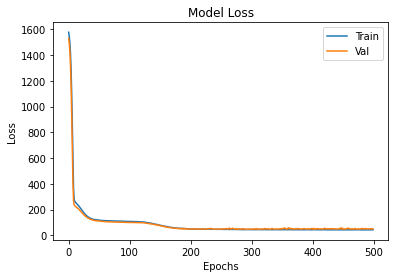

In [32]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

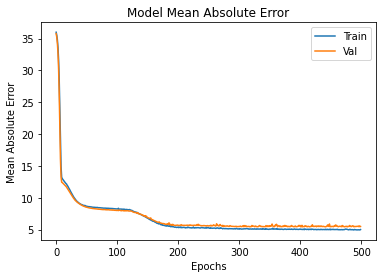

In [33]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (2) Retune Model (add dropout layer)

In [34]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(15, activation='relu', input_dim=8))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [35]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [36]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
23/23 [==============================] - 1s 11ms/step - loss: 1596.3204 - mae: 36.2757 - val_loss: 1538.1628 - val_mae: 35.8802
Epoch 2/500
23/23 [==============================] - 0s 6ms/step - loss: 1559.8896 - mae: 35.5335 - val_loss: 1500.1538 - val_mae: 35.3436
Epoch 3/500
23/23 [==============================] - 0s 6ms/step - loss: 1508.8356 - mae: 35.0724 - val_loss: 1427.0820 - val_mae: 34.3017
Epoch 4/500
23/23 [==============================] - 0s 6ms/step - loss: 1454.5466 - mae: 33.9630 - val_loss: 1301.1377 - val_mae: 32.4345
Epoch 5/500
23/23 [==============================] - 0s 6ms/step - loss: 1274.8241 - mae: 31.5203 - val_loss: 1094.0166 - val_mae: 29.1263
Epoch 6/500
23/23 [==============================] - 0s 6ms/step - loss: 1138.7924 - mae: 29.1028 - val_loss: 814.9216 - val_mae: 24.2068
Epoch 7/500
23/23 [==============================] - 0s 6ms/step - loss: 803.4373 - mae: 23.2576 - val_loss: 518.8179 - val_mae: 18.3076
Epoch 8/500
23/23 [==========

23/23 [==============================] - 0s 5ms/step - loss: 347.2691 - mae: 14.0934 - val_loss: 160.3372 - val_mae: 10.0724
Epoch 61/500
23/23 [==============================] - 0s 6ms/step - loss: 251.8259 - mae: 12.3663 - val_loss: 151.2799 - val_mae: 9.7907
Epoch 62/500
23/23 [==============================] - 0s 6ms/step - loss: 305.0002 - mae: 13.2240 - val_loss: 141.1322 - val_mae: 9.4699
Epoch 63/500
23/23 [==============================] - 0s 5ms/step - loss: 290.3818 - mae: 13.2416 - val_loss: 150.1048 - val_mae: 9.7502
Epoch 64/500
23/23 [==============================] - 0s 5ms/step - loss: 303.5715 - mae: 13.2431 - val_loss: 151.0391 - val_mae: 9.7842
Epoch 65/500
23/23 [==============================] - 0s 5ms/step - loss: 286.2172 - mae: 12.9026 - val_loss: 146.1566 - val_mae: 9.6382
Epoch 66/500
23/23 [==============================] - 0s 6ms/step - loss: 295.2273 - mae: 13.0409 - val_loss: 154.1454 - val_mae: 9.8770
Epoch 67/500
23/23 [==============================] -

Epoch 120/500
23/23 [==============================] - 0s 7ms/step - loss: 196.9313 - mae: 10.9830 - val_loss: 123.7324 - val_mae: 8.9993
Epoch 121/500
23/23 [==============================] - 0s 8ms/step - loss: 206.2584 - mae: 11.1953 - val_loss: 123.4345 - val_mae: 8.9904
Epoch 122/500
23/23 [==============================] - 0s 8ms/step - loss: 228.8363 - mae: 11.6048 - val_loss: 124.1523 - val_mae: 9.0099
Epoch 123/500
23/23 [==============================] - 0s 9ms/step - loss: 185.3768 - mae: 10.6568 - val_loss: 122.4658 - val_mae: 8.9558
Epoch 124/500
23/23 [==============================] - 0s 8ms/step - loss: 187.9413 - mae: 10.8496 - val_loss: 119.8888 - val_mae: 8.8695
Epoch 125/500
23/23 [==============================] - 0s 6ms/step - loss: 211.1680 - mae: 11.1886 - val_loss: 123.2080 - val_mae: 8.9697
Epoch 126/500
23/23 [==============================] - 0s 6ms/step - loss: 200.3127 - mae: 10.9333 - val_loss: 115.2390 - val_mae: 8.7197
Epoch 127/500
23/23 [=============

23/23 [==============================] - 0s 6ms/step - loss: 166.2422 - mae: 9.9848 - val_loss: 124.4394 - val_mae: 8.9528
Epoch 180/500
23/23 [==============================] - 0s 7ms/step - loss: 172.2753 - mae: 10.2070 - val_loss: 123.8142 - val_mae: 8.9352
Epoch 181/500
23/23 [==============================] - 0s 7ms/step - loss: 171.1740 - mae: 10.1527 - val_loss: 132.7439 - val_mae: 9.2250
Epoch 182/500
23/23 [==============================] - 0s 6ms/step - loss: 167.8493 - mae: 10.0895 - val_loss: 128.0194 - val_mae: 9.0737
Epoch 183/500
23/23 [==============================] - 0s 6ms/step - loss: 153.3147 - mae: 9.6267 - val_loss: 123.1511 - val_mae: 8.9150
Epoch 184/500
23/23 [==============================] - 0s 7ms/step - loss: 177.5505 - mae: 10.3472 - val_loss: 125.9423 - val_mae: 9.0001
Epoch 185/500
23/23 [==============================] - 0s 7ms/step - loss: 185.3555 - mae: 10.5007 - val_loss: 126.5726 - val_mae: 9.0357
Epoch 186/500
23/23 [=============================

Epoch 239/500
23/23 [==============================] - 0s 8ms/step - loss: 142.1590 - mae: 9.3772 - val_loss: 125.8308 - val_mae: 8.9754
Epoch 240/500
23/23 [==============================] - 0s 8ms/step - loss: 175.0691 - mae: 10.1930 - val_loss: 134.8902 - val_mae: 9.2716
Epoch 241/500
23/23 [==============================] - 0s 8ms/step - loss: 157.7890 - mae: 9.6428 - val_loss: 124.9597 - val_mae: 8.9539
Epoch 242/500
23/23 [==============================] - 0s 8ms/step - loss: 145.5796 - mae: 9.3562 - val_loss: 123.0481 - val_mae: 8.8956
Epoch 243/500
23/23 [==============================] - 0s 6ms/step - loss: 158.0367 - mae: 9.6558 - val_loss: 127.0863 - val_mae: 9.0139
Epoch 244/500
23/23 [==============================] - 0s 6ms/step - loss: 154.0597 - mae: 9.4673 - val_loss: 122.8328 - val_mae: 8.8769
Epoch 245/500
23/23 [==============================] - 0s 6ms/step - loss: 152.6830 - mae: 9.5257 - val_loss: 122.5422 - val_mae: 8.8649
Epoch 246/500
23/23 [===================

Epoch 299/500
23/23 [==============================] - 0s 8ms/step - loss: 138.0252 - mae: 9.1812 - val_loss: 148.7750 - val_mae: 9.7464
Epoch 300/500
23/23 [==============================] - 0s 7ms/step - loss: 128.3734 - mae: 8.7617 - val_loss: 152.3877 - val_mae: 9.8600
Epoch 301/500
23/23 [==============================] - 0s 6ms/step - loss: 135.4063 - mae: 9.0292 - val_loss: 163.7687 - val_mae: 10.2071
Epoch 302/500
23/23 [==============================] - 0s 6ms/step - loss: 139.0676 - mae: 9.1276 - val_loss: 156.1789 - val_mae: 9.9721
Epoch 303/500
23/23 [==============================] - 0s 6ms/step - loss: 138.1301 - mae: 9.1271 - val_loss: 155.5327 - val_mae: 9.9548
Epoch 304/500
23/23 [==============================] - 0s 7ms/step - loss: 144.8607 - mae: 9.3893 - val_loss: 156.3914 - val_mae: 9.9762
Epoch 305/500
23/23 [==============================] - 0s 7ms/step - loss: 144.1841 - mae: 9.5044 - val_loss: 159.5707 - val_mae: 10.0741
Epoch 306/500
23/23 [==================

23/23 [==============================] - 0s 6ms/step - loss: 136.5104 - mae: 9.0447 - val_loss: 185.7365 - val_mae: 10.8465
Epoch 359/500
23/23 [==============================] - 0s 6ms/step - loss: 133.5295 - mae: 8.9450 - val_loss: 199.2253 - val_mae: 11.2838
Epoch 360/500
23/23 [==============================] - 0s 6ms/step - loss: 131.4564 - mae: 9.0666 - val_loss: 195.8728 - val_mae: 11.1627
Epoch 361/500
23/23 [==============================] - 0s 6ms/step - loss: 131.2322 - mae: 8.8019 - val_loss: 202.7271 - val_mae: 11.3645
Epoch 362/500
23/23 [==============================] - 0s 6ms/step - loss: 132.5598 - mae: 9.0846 - val_loss: 193.5403 - val_mae: 11.0785
Epoch 363/500
23/23 [==============================] - 0s 6ms/step - loss: 129.4961 - mae: 8.9122 - val_loss: 194.9758 - val_mae: 11.1337
Epoch 364/500
23/23 [==============================] - 0s 6ms/step - loss: 171.8765 - mae: 10.1760 - val_loss: 194.8296 - val_mae: 11.1261
Epoch 365/500
23/23 [==========================

23/23 [==============================] - 0s 6ms/step - loss: 138.3101 - mae: 9.0780 - val_loss: 195.9908 - val_mae: 11.1187
Epoch 418/500
23/23 [==============================] - 0s 6ms/step - loss: 131.8865 - mae: 8.9173 - val_loss: 197.1397 - val_mae: 11.1653
Epoch 419/500
23/23 [==============================] - 0s 6ms/step - loss: 152.1391 - mae: 9.4713 - val_loss: 209.8467 - val_mae: 11.5423
Epoch 420/500
23/23 [==============================] - 0s 6ms/step - loss: 135.3290 - mae: 9.0855 - val_loss: 198.4695 - val_mae: 11.1835
Epoch 421/500
23/23 [==============================] - 0s 6ms/step - loss: 126.9105 - mae: 8.7103 - val_loss: 201.0735 - val_mae: 11.2677
Epoch 422/500
23/23 [==============================] - 0s 6ms/step - loss: 153.0534 - mae: 9.3057 - val_loss: 202.2286 - val_mae: 11.3216
Epoch 423/500
23/23 [==============================] - 0s 6ms/step - loss: 125.8780 - mae: 8.5333 - val_loss: 195.5529 - val_mae: 11.1173
Epoch 424/500
23/23 [===========================

23/23 [==============================] - 0s 7ms/step - loss: 144.3667 - mae: 9.4902 - val_loss: 217.7575 - val_mae: 11.7598
Epoch 477/500
23/23 [==============================] - 0s 6ms/step - loss: 138.5078 - mae: 9.0887 - val_loss: 208.0058 - val_mae: 11.4781
Epoch 478/500
23/23 [==============================] - 0s 6ms/step - loss: 127.5540 - mae: 8.7495 - val_loss: 211.0512 - val_mae: 11.5709
Epoch 479/500
23/23 [==============================] - 0s 6ms/step - loss: 140.8102 - mae: 9.0894 - val_loss: 208.5268 - val_mae: 11.4952
Epoch 480/500
23/23 [==============================] - 0s 6ms/step - loss: 140.3674 - mae: 9.2789 - val_loss: 222.5943 - val_mae: 11.9279
Epoch 481/500
23/23 [==============================] - 0s 6ms/step - loss: 126.7468 - mae: 8.7049 - val_loss: 210.7767 - val_mae: 11.5548
Epoch 482/500
23/23 [==============================] - 0s 6ms/step - loss: 133.4423 - mae: 9.0083 - val_loss: 213.7613 - val_mae: 11.6364
Epoch 483/500
23/23 [===========================

# Check Model Loss and Error

In [37]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

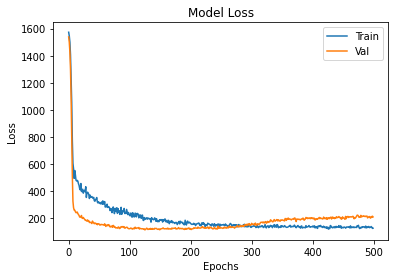

In [38]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

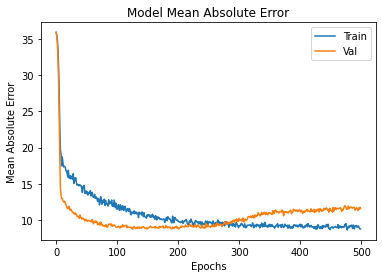

In [39]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (3) Final Model

In [40]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(15, activation='relu', input_dim=8))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [41]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [42]:
hist = model.fit(
    x_train_s, y_train, epochs = 200,
    validation_data = (x_val_s, y_val)
)

Epoch 1/200
23/23 [==============================] - 0s 10ms/step - loss: 1641.5906 - mae: 36.8967 - val_loss: 1512.8555 - val_mae: 35.5536
Epoch 2/200
23/23 [==============================] - 0s 6ms/step - loss: 1498.8754 - mae: 34.6751 - val_loss: 1472.8735 - val_mae: 34.9986
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 1473.9183 - mae: 34.4775 - val_loss: 1409.4940 - val_mae: 34.1004
Epoch 4/200
23/23 [==============================] - 0s 6ms/step - loss: 1417.6498 - mae: 34.0612 - val_loss: 1301.7994 - val_mae: 32.5227
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 1278.4809 - mae: 31.8014 - val_loss: 1123.9526 - val_mae: 29.7514
Epoch 6/200
23/23 [==============================] - 0s 6ms/step - loss: 1087.1277 - mae: 28.5266 - val_loss: 859.4692 - val_mae: 25.2206
Epoch 7/200
23/23 [==============================] - 0s 8ms/step - loss: 795.8940 - mae: 23.5032 - val_loss: 535.1022 - val_mae: 18.8275
Epoch 8/200
23/23 [==========

Epoch 61/200
23/23 [==============================] - 0s 5ms/step - loss: 107.2740 - mae: 8.2624 - val_loss: 102.5186 - val_mae: 8.1512
Epoch 62/200
23/23 [==============================] - 0s 5ms/step - loss: 108.6946 - mae: 8.3382 - val_loss: 101.9956 - val_mae: 8.1096
Epoch 63/200
23/23 [==============================] - 0s 5ms/step - loss: 107.3936 - mae: 8.1354 - val_loss: 102.4479 - val_mae: 8.1493
Epoch 64/200
23/23 [==============================] - 0s 5ms/step - loss: 121.1924 - mae: 8.8232 - val_loss: 102.2036 - val_mae: 8.1120
Epoch 65/200
23/23 [==============================] - 0s 5ms/step - loss: 110.6146 - mae: 8.3211 - val_loss: 102.0151 - val_mae: 8.0969
Epoch 66/200
23/23 [==============================] - 0s 5ms/step - loss: 105.6112 - mae: 8.1806 - val_loss: 101.7091 - val_mae: 8.0942
Epoch 67/200
23/23 [==============================] - 0s 5ms/step - loss: 100.9306 - mae: 8.1384 - val_loss: 101.7608 - val_mae: 8.1061
Epoch 68/200
23/23 [============================

23/23 [==============================] - 0s 7ms/step - loss: 94.6768 - mae: 7.6605 - val_loss: 98.0408 - val_mae: 7.9241
Epoch 122/200
23/23 [==============================] - 0s 7ms/step - loss: 98.5056 - mae: 7.8411 - val_loss: 98.1995 - val_mae: 7.9248
Epoch 123/200
23/23 [==============================] - 0s 6ms/step - loss: 107.0772 - mae: 8.1889 - val_loss: 97.2035 - val_mae: 7.8880
Epoch 124/200
23/23 [==============================] - 0s 6ms/step - loss: 109.0710 - mae: 8.3224 - val_loss: 97.3443 - val_mae: 7.8560
Epoch 125/200
23/23 [==============================] - 0s 6ms/step - loss: 112.9299 - mae: 8.3795 - val_loss: 97.4421 - val_mae: 7.8955
Epoch 126/200
23/23 [==============================] - 0s 6ms/step - loss: 104.9569 - mae: 8.0079 - val_loss: 97.3080 - val_mae: 7.9067
Epoch 127/200
23/23 [==============================] - 0s 7ms/step - loss: 99.6105 - mae: 7.9096 - val_loss: 96.9964 - val_mae: 7.8864
Epoch 128/200
23/23 [==============================] - 0s 7ms/ste

Epoch 182/200
23/23 [==============================] - 0s 6ms/step - loss: 69.8276 - mae: 6.4949 - val_loss: 74.5250 - val_mae: 6.7522
Epoch 183/200
23/23 [==============================] - 0s 6ms/step - loss: 62.7773 - mae: 6.0525 - val_loss: 73.0013 - val_mae: 6.7095
Epoch 184/200
23/23 [==============================] - 0s 7ms/step - loss: 65.6812 - mae: 6.1958 - val_loss: 74.5946 - val_mae: 6.7210
Epoch 185/200
23/23 [==============================] - 0s 7ms/step - loss: 68.8061 - mae: 6.3709 - val_loss: 74.7729 - val_mae: 6.7162
Epoch 186/200
23/23 [==============================] - 0s 7ms/step - loss: 65.4606 - mae: 6.2430 - val_loss: 71.5344 - val_mae: 6.6342
Epoch 187/200
23/23 [==============================] - 0s 10ms/step - loss: 66.7791 - mae: 6.2374 - val_loss: 70.6431 - val_mae: 6.5905
Epoch 188/200
23/23 [==============================] - 0s 6ms/step - loss: 61.2373 - mae: 6.0276 - val_loss: 72.1224 - val_mae: 6.5896
Epoch 189/200
23/23 [==============================] -

# Check Model Loss and Error

In [43]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

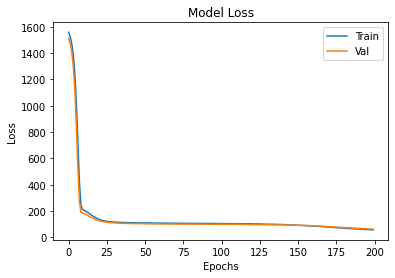

In [44]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

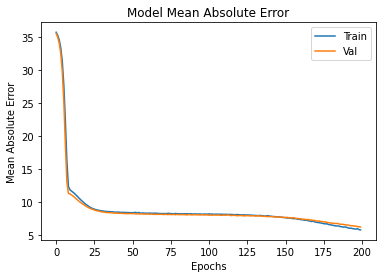

In [45]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Model Evaluation on Test Data

In [46]:
model.evaluate(x_test_s, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 69.9599 - mae: 6.3902


[69.95986938476562, 6.390168190002441]

In [ ]:
# Mean Absolute Error = 6.39

# Plot Data to See Variations in Predictions

In [47]:
predictions = model.predict(x_test_s)

In [48]:
print(len(predictions))
print(len(x_test_s))

154
154


In [49]:
y_train['Type'] = 'Train'

C:\ProgramData\Anaconda3\envs\amir-gpu3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
y_test['Type'] = 'Test'

In [51]:
pred = pd.DataFrame(data = predictions,index = y_test.index, columns=['Predcited Strength'])

In [52]:
plot = pd.DataFrame()
plot = pd.concat([y_train,y_test])
plot = plot.merge(pred,how='left',left_index=True, right_index=True)

In [53]:
plot

,strength,Type,Predcited Strength
196,25.72,Train,NaN
631,17.54,Train,NaN
81,25.20,Train,NaN
526,23.64,Train,NaN
830,33.76,Train,NaN
...,...,...,...
92,24.10,Test,46.826000
682,24.05,Test,17.870935
464,56.81,Test,51.404396
259,13.33,Test,24.640547


In [54]:
plot_s = plot.reset_index()

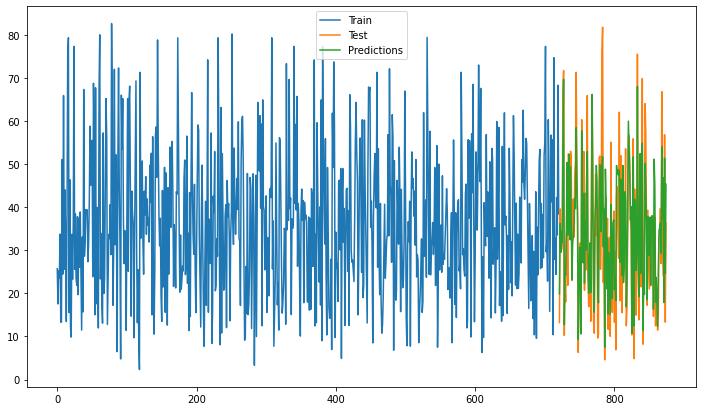

In [55]:
plt.figure(figsize=(12,7))
plt.plot(plot_s[plot_s.Type == 'Train']['strength'],label='Train')
plt.plot(plot_s[plot_s.Type == 'Test']['strength'],label='Test')
plt.plot(plot_s['Predcited Strength'],label='Predictions')
plt.legend()
plt.show()